# Restaurant Recommendation System

## Introduction

The aim of this document is to explore the idea of a recommendation system that would recommend restaurants to people in the New York neighborhood. This report describes the work to learn to predict and make recommendations to people in New York based on location data related to the restaurants in the neighborhood of New York and the Ratings given to these restaurants by others.

## Table of Contents  

1. Business Problem
2. Data Requirements
3. Data Collection
4. Methodology
5. Results and Discussion
6. Conclusion

## 1. Business Problem

New York is one of the most populous cities in the United States and in the World.  This city is described as the cultural, financial and media capital of the world. This brings a lot of travellers to this city.

People visiting new places would love to get recommendations about things to do, about places to see and about places to dine in. This has resulted in the increased popularity of several recommendation websites and apps like Yelp that provide recommendations to people. In addition, in a populous place like New York where life is fast paced, it would be of great help if people are able to find useful recommendations that would save them a lot of time.

Being able to recommend restaurants for people to dine in when they are travelling or visiting a new place like New York is a very valuable feature as far as the recommendation system goes. In this document the we will try and build a model that would recommend restaurants to users in the neighborhoods of New York based on what is popular in a certain place based on ratings and reviews provided by other people and also based on proximity to the user.

In this document we will try to explore and optimize the algorithms to provide a recommendation of the top restaurants to the user and try and validate the accuracy of the model. In our model we will try to take into account the location of the user and also the popularity of the restaurants in the neighborhoods of New York.

## 2. Data Requirements

To be able to make recommendations on Restaurants in the Neighborhoods of New York, we will need some data that will form the basis for our recommendation.

How can we make recommendations regarding restaurants to a user? For being able to make recommendations we will need to understand the users preferences in terms of what kind of food they like to eat and their current location to be able to find restaurants near them.

Is it enough if we understand the users preferences and location for being able to make a recommendation? No, in addition to understanding the preferences and the location of the user for whom we are making the recommendation, we will also need to identify the neighborhoods of New York and then get the list of restaurants that are present in the neighborhoods of New York and the also understand their popularity to know which ones are good and which ones are not.

## 3. Data Collection

There is a variety of data that we need for building our recommendation system and this will need to be collected from various sources as identified below.

1) Neighborhood data for New York : 
    The Neighborhood has a total of 5 boroughs and 306 neighborhoods. We will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. This dataset is provided by New York University and is available for free on the web. We will download and use this data for the Neighborhood data.
    
2) Restaurant Data for New York :
    We will use the Places API provided by Foursquare and gather location data regarding restaurants using their API. For using their API for get the location data pertaining to the restaurants in the neighborhoods of New York, we will need the latitude and longitude coordinates for the neighborhoods. The coordinates are available to us as part of the Neighborhood data that we collected in 1).
 
3) Ratings Data for the Restaurants:
    We will again use the Places API provided by Foursquare to gather the ratings data for the list of restaurants that we collected in 2).

### 3.1 Neighborhood data for New York:

We will download the dataset pertaining to the nighborhoods of New York from ***https://<span></span>cocl.us/new_york_dataset***

In [1]:
!wget -q -O 'New_York_Neighborhood_Data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


Let us load the neighborhood data from the json file and take a quick look at the data in the file.

In [2]:
# import the json library for handling json files
import json

# Load the data from the json file
with open ('New_York_Neighborhood_Data.json') as json_data:
    ny_neighborhood_data = json.load(json_data)

json.load() returns the list of neighborhoods data with features as the key. Let us take a look at the data pertaining to one neighborhood from this list.

In [3]:
ny_neighborhood_data['features'][0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Let us read the data for all the neighborhoods of New York from this list and load it into a pandas dataframe.

In [4]:
# import the pandas library
import pandas as pd

# extract the list of neighborhoods
list_neighborhood_data = ny_neighborhood_data['features']

# Define the empty data frame for loading the neighborhood data
df_ny_neighborhood_data = pd.DataFrame(columns = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'])

for i in range(0,len(list_neighborhood_data)):
    borough = list_neighborhood_data[i]['properties']['borough']
    neighborhood = list_neighborhood_data[i]['properties']['name']
    latitude = list_neighborhood_data[i]['geometry']['coordinates'][1]
    longitude = list_neighborhood_data[i]['geometry']['coordinates'][0]
    
    df_ny_neighborhood_data = df_ny_neighborhood_data.append ({'Borough' : borough,
                                                               'Neighborhood' : neighborhood,
                                                               'Latitude' : latitude,
                                                               'Longitude' : longitude}, ignore_index=True)

print ('Shape of dataframe is ', df_ny_neighborhood_data.shape)
df_ny_neighborhood_data.head()

Shape of dataframe is  (306, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Let us look at the distinct boroughs of New York

In [5]:
df_ny_neighborhood_data['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

Let us plot the Neighborhoods in a map for visualizing their location on the map of New York.

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line for installing folium
import folium # library for maps

!conda install -c conda-forge geopy --yes # uncomment this line for installing geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Find the Latitude and Longitude of New York
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Define a different color for the markers for each borough
color_map = {'Bronx':'red', 'Manhattan':'green', 'Brooklyn':'blue', 'Queens':'yellow', 'Staten Island':'orange'}

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_ny_neighborhood_data['Latitude'], df_ny_neighborhood_data['Longitude'], df_ny_neighborhood_data['Borough'], df_ny_neighborhood_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=color_map.get(borough),
        fill=True,
        fill_color=color_map.get(borough),
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.7                |           py36_0         869 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_0         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following packages will be UPDATED:

  conda                                        4.6.4-py36_0 --> 4.6.7-py36_0
  openssl                              1.1.1a-h14c3975_1000 --> 1.1.1b-h14c3975_0



conda-4.6.7          | 869 KB    | ##################################### | 100% 
openssl-1.1.1b       | 4.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executi

### 3.2 Restaurant Data for New York from Foursquare

Let us define the credentials for accessing the Foursquare API.

In [7]:
# @hidden_cell
CLIENT_ID = '532CJWN2YHXD2TR0JF2J32FFAJ1OOSVBUAJ4G3BUFXV5ZURB' # your Foursquare ID
CLIENT_SECRET = 'AHAELISONAQKGDESXTPGT1O04GRTOZFMJYVY11I4TZIYLSVT' # your Foursquare Secret
VERSION = '20180604' # version of Foursquare API to be used

Using the Search API, let us search for restaurants in the neighborhoods of New York and load the restaurants data into a pandas dataframe. 

In [8]:
# import library to handle requests
import requests

## create a pandas dataframe for storing New York neighborhoods and restaurants data in one table
df_newyork_restaurants = pd.DataFrame(columns = ['Borough', 'Neighborhood', 'Neigh_Latitude', 'Neigh_Longitude', 'Restaurant_Name',
                                                 'Restaurant_City', 'Restaurant_Address', 'Restaurant_Latitude', 'Restaurant_Longitude', 
                                                 'Restaurant_Category', 'Restaurant_Category_Id', 'Foursquare_Venue_Id'])

# URL parameters
RADIUS = 1000
QUERY = 'restaurant'
LIMIT = 50

# Loop through the New York neighborhood data
for index, row in df_ny_neighborhood_data.iterrows():
    # retrieve neighborhood details from the dataframe for current row
    borough = row[0]
    neighborhood = row[1]
    LATITUDE = row[2]
    LONGITUDE = row[3]
    
    # fetch the results from the Search API for the neighborhood
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results = requests.get(url).json()
    
    # Loop through the List of restaurants retrieved from Foursquare for the neighborhood
    for i in range(0,len(results['response']['venues'])):
        # retrieve restaurant details from the result list for current row
        restaurant_name = results['response']['venues'][i]['name']

        try:
            restaurant_city = results['response']['venues'][i]['location']['city']
        except:
            restaurant_city = ''
            
        restaurant_address = results['response']['venues'][i]['location']['formattedAddress']
        restaurant_latitude = results['response']['venues'][i]['location']['lat']
        restaurant_longitude = results['response']['venues'][i]['location']['lng']
        restaurant_Venue_id = results['response']['venues'][i]['id']

        # Check to see if the restaurant has any categories
        if (len(results['response']['venues'][i]['categories']) > 0):
            restaurant_category = results['response']['venues'][i]['categories'][0]['name']
            restaurant_category_id = results['response']['venues'][i]['categories'][0]['id']
        else:
            restaurant_category = ''
            restaurant_category_id = ''
        
        # Add the data row to the restaurants dataframe
        df_newyork_restaurants = df_newyork_restaurants.append({'Borough' : borough,
                                                                'Neighborhood' : neighborhood, 
                                                                'Neigh_Latitude' : LATITUDE, 
                                                                'Neigh_Longitude' : LONGITUDE, 
                                                                'Restaurant_Name' : restaurant_name,
                                                                'Restaurant_City' : restaurant_city,
                                                                'Restaurant_Address' : restaurant_address,
                                                                'Restaurant_Latitude' : restaurant_latitude,
                                                                'Restaurant_Longitude' : restaurant_longitude, 
                                                                'Restaurant_Category' : restaurant_category,
                                                                'Restaurant_Category_Id' : restaurant_category_id,
                                                                'Foursquare_Venue_Id' : restaurant_Venue_id}, ignore_index=True)

# Print the first 2 rows of the Restaurants dataframe to check the data
df_newyork_restaurants.head(2)

,Borough,Neighborhood,Neigh_Latitude,Neigh_Longitude,Restaurant_Name,Restaurant_City,Restaurant_Address,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Category,Restaurant_Category_Id,Foursquare_Venue_Id
0,Bronx,Wakefield,40.894705,-73.847201,Big Daddy's Caribbean Taste Restaurant,Bronx,"[4406 White Plains Rd (Nereid Avenue), Bronx, ...",40.899767,-73.857135,Caribbean Restaurant,4bf58dd8d48988d144941735,4db03c875da32cf2df4509f4
1,Bronx,Wakefield,40.894705,-73.847201,Kaieteur Restaurant & Bakery,Bronx,"[4379 White Plains Rd (at E 237th St), Bronx, ...",40.899768,-73.857184,Caribbean Restaurant,4bf58dd8d48988d144941735,4c66e0068e9120a15929d964


In [9]:
df_newyork_restaurants.shape

(9051, 12)

Foursquare has resturned 9051 restaurants in the City of New York. Let us check to see if there are any duplicate entries for restaurants in the data set obtained.

In [10]:
len(df_newyork_restaurants['Foursquare_Venue_Id'].unique())

4984

We can see that there are only 4982 unique restaurants in the data set. So let us cleanup the restaurants dataset by removing the duplicates from the dataframe.

In [11]:
# create a copy of the restaurants dataframe for storing the new list without the duplicate restaurants
df_ny_restaurants = df_newyork_restaurants.drop_duplicates(subset='Foursquare_Venue_Id', keep='first', inplace=False)
print (df_ny_restaurants.shape)
df_ny_restaurants.head(2)

(4984, 12)


,Borough,Neighborhood,Neigh_Latitude,Neigh_Longitude,Restaurant_Name,Restaurant_City,Restaurant_Address,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Category,Restaurant_Category_Id,Foursquare_Venue_Id
0,Bronx,Wakefield,40.894705,-73.847201,Big Daddy's Caribbean Taste Restaurant,Bronx,"[4406 White Plains Rd (Nereid Avenue), Bronx, ...",40.899767,-73.857135,Caribbean Restaurant,4bf58dd8d48988d144941735,4db03c875da32cf2df4509f4
1,Bronx,Wakefield,40.894705,-73.847201,Kaieteur Restaurant & Bakery,Bronx,"[4379 White Plains Rd (at E 237th St), Bronx, ...",40.899768,-73.857184,Caribbean Restaurant,4bf58dd8d48988d144941735,4c66e0068e9120a15929d964


Now we have the list of restaurants in the New York neighborhood.

Before proceeding to find the ratings for the restaurants, let us download a copy of the restaurants data collected from Foursquare. This will enable us to maintain a local copy this data for future use to ensure we are working on the same dataset for our analysis during the course of this project. This local copy will also be helpful for any data cleanup activities that would be required to the restaurant data.

In [12]:
df_ny_restaurants.to_csv('New_York_Restaurants.csv')
print ('Restaurant Data Downloaded to csv file.')

Restaurant Data Downloaded to csv file.


### 3.3 Ratings data for the Restaurants

The Venue Details API from Foursquare, provides rating information for the venues in their database. The rating information is provided if the ratings are available in the Foursquare database. In our case we are looking for ratings for the Restaurants in the neighborhoods of New York. Let us invoke the Venue Details API to get the ratings for the restaurants in our list.

In [13]:
# Loop through the list of restaurants to find the ratings for each
for index, row in df_ny_restaurants.iterrows():
    VENUE_ID = row[11]
    
    # Form the URL for the Foursquare Venue Details API
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                      CLIENT_ID,
                                                                                                      CLIENT_SECRET,
                                                                                                      VERSION)
    venue_details = requests.get(details_url).json()
    
    # Read the ratings from the API response
    try:
        rating = venue_details['response']['venue']['rating']
    except:
        rating = 0.0
        
    # Populate the ratings onto the restaurants dataframe
    df_ny_restaurants.loc[index, 'Rating'] = rating

print ('Ratings have been fetched from Foursquare.')

Ratings have been fetched from Foursquare.


Now that the ratings have been fetched from Foursquare. Let us do a quick check of the rating values.

In [14]:
df_ny_restaurants['Rating'].unique()

array([ 0. ,  6.5,  6.7,  8.7,  5.7,  6. ,  8. ,  8.1,  5.9,  5.2,  5.8,
        6.6,  9.1,  7.7,  6.1,  8.8,  7.2,  6.8,  7. ,  7.4,  7.6,  7.5,
        7.1,  8.3,  6.2,  6.3,  7.3,  8.4,  8.2,  8.9,  8.6,  5.5,  7.9,
        6.4,  5.6,  8.5])

Now based on the data gathered so far, we have the list of the neighborhoods of New York. We also have data pertaining for the restaurants in the neighborhoods of New York, and the ratings for the restaurants from Foursquare. Thus we have gathered all the data that we need for our analysis. 

Let us start analysing the data that we have gathered so far and start modeling our recommendation system.

## 4. Methodology

We will be focussing on finding the restaurants in the neighborhoods of New York that in order of their ratings and also in order of distance from where the user is located.

In this project we will mainly be looking at the restaurants data collected from the Foursquare API. This data pertains to the Restaurants, their categories, their location and ratings. We will then be exploring the categories, ratings and locations of these restaurants to be able to make a recommendation. This recommendation will mainly be based on the User's location and restaurants that are in proximity to the user.

We will also use the folium library to visualize the neighborhoods and Boroughs of New York. We will also visualize the user's location and the location of the restaurants on the Map of New York to evaluate our recommendation of restaurants.

-------------------------------------------------------------------------------

Let us start of with some exploratory data analysis to gain a better understanding of the data that we have gathered. Let us first take a look at the number of restaurants present in each borough in New York.

In [15]:
pd.DataFrame(df_ny_restaurants[['Borough','Restaurant_Name']]).groupby('Borough').count()

,Restaurant_Name
Borough,
Bronx,915
Brooklyn,1516
Manhattan,1001
Queens,1340
Staten Island,212


### 4.1 Restaurants by Category

Let us also take a look at number of restaurants in that fall into the various categories.

In [16]:
# Create a pandas DataFrame showing the Restaurant Categories and Boroughs. 
df_restaurant_categories = df_ny_restaurants[['Borough', 'Restaurant_Category']].copy()
df_restaurant_categories['COUNTER'] = 1
df_restaurant_categories.set_index('Borough', inplace = True)
pd.DataFrame(df_restaurant_categories.groupby(['Restaurant_Category'])['COUNTER'].sum()).sort_values('COUNTER', ascending = False)

,COUNTER
Restaurant_Category,
Food,929
Chinese Restaurant,807
Pizza Place,287
Caribbean Restaurant,243
Italian Restaurant,220
Mexican Restaurant,206
Restaurant,203
Latin American Restaurant,174
Spanish Restaurant,171


From this grouping we can observe the following
* There are Restaurant Categories that are not True Restaurants
* A lot of the Restaurants are not categorized at all.  

We will need to cleanup data pertaining to the above observations. We will review the restaurants data do one of the following for cleaning this up before further analysis.
* Update the Category where we can
* Remove the entries that do not correspond to true Restaurants

We will use the csv file that we had downloaded earlier with all the uptodate restaurant information for performing this cleanup and then use the cleaned up data for further analysis.

#### Findings from the analysis done for data quality

**Now the Data clean up has been done.** The following **issues** were found with the data. The list of restaurants fetched from FourSquare included 
* data for restaurants that have actually been closed.
* data for venues / businesses that are not restaurants.
* restaurant data where the restaurants were not categorized at all
* restaurant data where the restaurants were not categorized correctly

#### Steps taken for cleaning up the data

The following steps were taken to clean up the data to address the above mentioned issues:
* Data related to closed restaurants was **removed**.
* Data related to other venues / businesses that are not restaurants was **removed**.
* Restaurants that were not categorized earlier were categorized.
* Restaurants that were not categorized correctly earlier were corrected.
**For categorizing the restaurants for the last 2 points mentioned, we looked up the category for these restaurants on the Web and updated our data accordingly.**

Now let us upload the cleaned up data and then use that for continuing with the analysis of the categories.

In [19]:
df_ny_restaurants = pd.read_csv('New_York_Restaurants_updated.csv')
print('Size of the cleaned up restaurants table is ', df_ny_restaurants.shape)
df_ny_restaurants.head(2)

Size of the cleaned up restaurants table is  (4787, 12)


,Borough,Neighborhood,Neigh_Latitude,Neigh_Longitude,Restaurant_Name,Restaurant_City,Restaurant_Address,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Category,Restaurant_Category_Id,Foursquare_Venue_Id
0,Bronx,Wakefield,40.894705,-73.847201,Big Daddy's Caribbean Taste Restaurant,Bronx,"['4406 White Plains Rd (Nereid Avenue)', 'Bron...",40.899767,-73.857135,Caribbean Restaurant,4bf58dd8d48988d144941735,4db03c875da32cf2df4509f4
1,Bronx,Wakefield,40.894705,-73.847201,Kaieteur Restaurant & Bakery,Bronx,"['4379 White Plains Rd (at E 237th St)', 'Bron...",40.899768,-73.857184,Caribbean Restaurant,4bf58dd8d48988d144941735,4c66e0068e9120a15929d964


We can see that the cleaned up table now has 4787 restaurants around the Neighborhood of New York. What we received from Foursquare has 4984 unique restaurants. This means that there were 197 restaurants in th eoriginal list that were either closed restaurants or were not restaurants.  

Now, we will create a table of the Boroughs and the Restaurant Categories with the cleaned up data and then analyse this further to see what the top categories are in each borough in terms of the number of Restaurants.

In [20]:
df_restaurant_categories = df_ny_restaurants[['Borough', 'Restaurant_Category']].copy()
df_restaurant_categories['COUNTER'] = 1
df_restaurant_categories.set_index('Borough', inplace = True)

# Create a Pandas Data Frame with the count of restaurants by category in Bronx
df_bronx_count = pd.DataFrame(df_restaurant_categories.loc['Bronx'].groupby(['Restaurant_Category']
                                                                           )['COUNTER'].sum()).sort_values('COUNTER', ascending = False)

# Create a Pandas Data Frame with the count of restaurants by category in Manhattan
df_manhattan_count = pd.DataFrame(df_restaurant_categories.loc['Manhattan'].groupby(['Restaurant_Category']
                                                                           )['COUNTER'].sum()).sort_values('COUNTER', ascending = False)

# Create a Pandas Data Frame with the count of restaurants by category in Brooklyn
df_brooklyn_count = pd.DataFrame(df_restaurant_categories.loc['Brooklyn'].groupby(['Restaurant_Category']
                                                                           )['COUNTER'].sum()).sort_values('COUNTER', ascending = False)

# Create a Pandas Data Frame with the count of restaurants by category in Queens
df_queens_count = pd.DataFrame(df_restaurant_categories.loc['Queens'].groupby(['Restaurant_Category']
                                                                           )['COUNTER'].sum()).sort_values('COUNTER', ascending = False)

# Create a Pandas Data Frame with the count of restaurants by category in Staten Island
df_statenisland_count = pd.DataFrame(df_restaurant_categories.loc['Staten Island'].groupby(['Restaurant_Category']
                                                                           )['COUNTER'].sum()).sort_values('COUNTER', ascending = False)

Let us plot bar charts showing the number of restaurants in each category in each Borough of New York

Number of Restaurants in Staten Island is  208


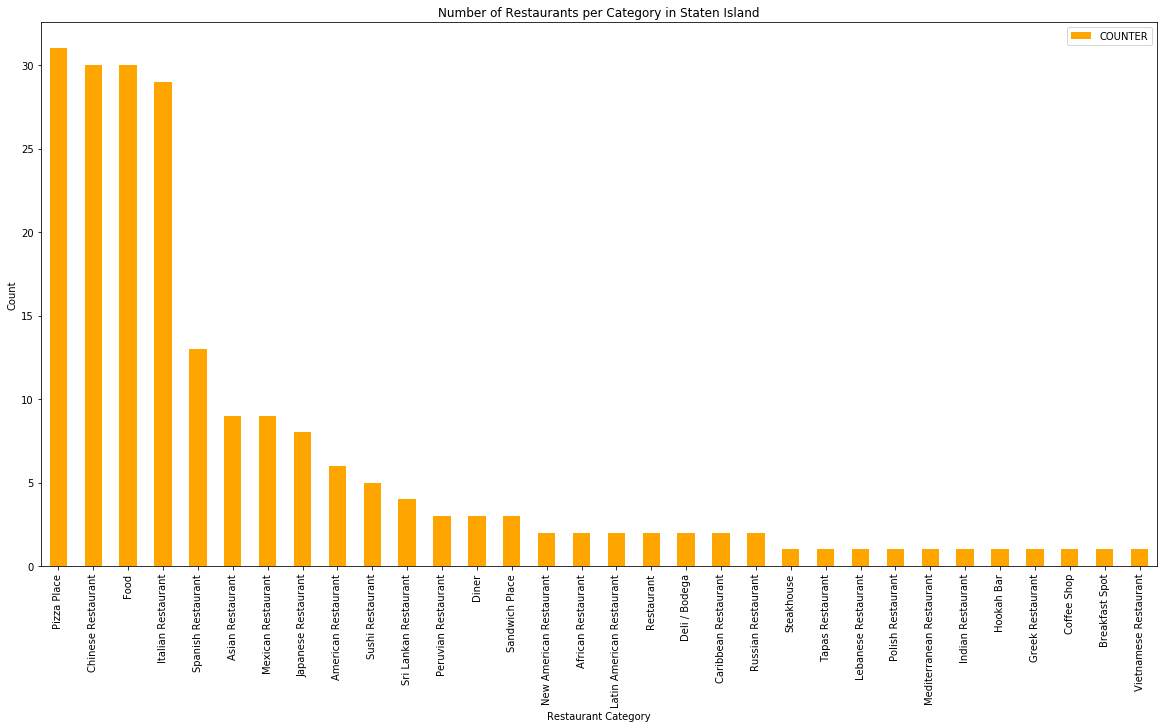

In [24]:
# Bar Chart for Staten Island
print ('Number of Restaurants in Staten Island is ', df_statenisland_count['COUNTER'].sum())
import matplotlib.pyplot as plt
df_statenisland_count.plot(kind='bar', color = 'orange', figsize=(20,10))
plt.title('Number of Restaurants per Category in Staten Island')
plt.ylabel('Count')
plt.xlabel('Restaurant Category')
plt.show()

Number of Restaurants in Bronx is  881


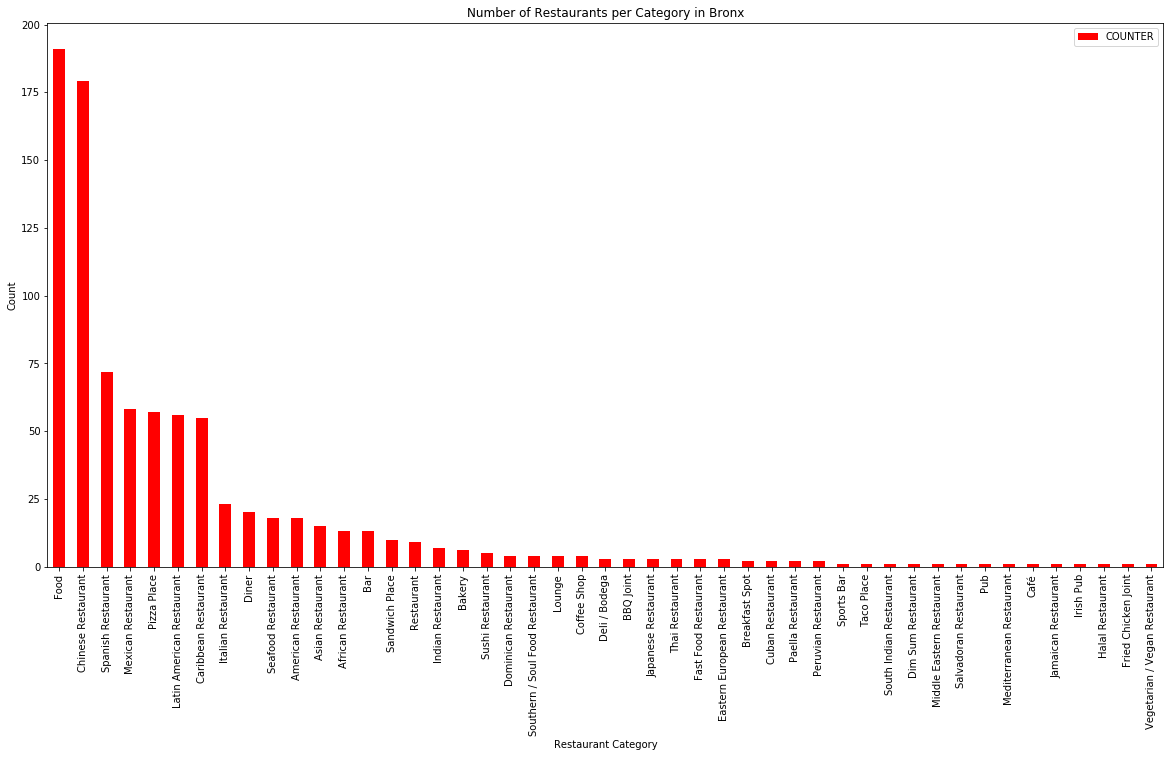

In [25]:
# Bar Chart for Bronx
print ('Number of Restaurants in Bronx is ', df_bronx_count['COUNTER'].sum())
import matplotlib.pyplot as plt
df_bronx_count.plot(kind='bar', color = 'red', figsize = (20,10))
plt.title('Number of Restaurants per Category in Bronx')
plt.ylabel('Count')
plt.xlabel('Restaurant Category')
plt.show()

Number of Restaurants in Manhattan is  945


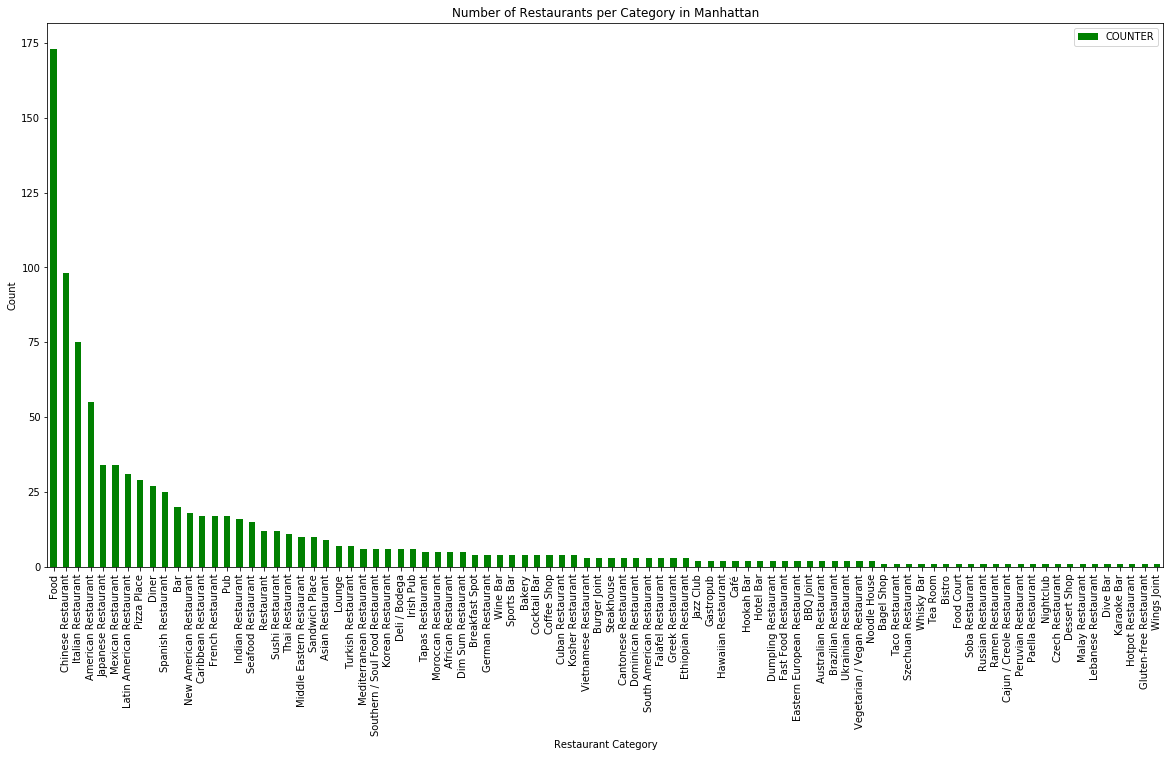

In [26]:
# Bar Chart for Manhattan
print ('Number of Restaurants in Manhattan is ', df_manhattan_count['COUNTER'].sum())
import matplotlib.pyplot as plt
df_manhattan_count.plot(kind='bar', color = 'green', figsize = (20,10))
plt.title('Number of Restaurants per Category in Manhattan')
plt.ylabel('Count')
plt.xlabel('Restaurant Category')
plt.show()

Number of Restaurants in Brooklyn is  1461


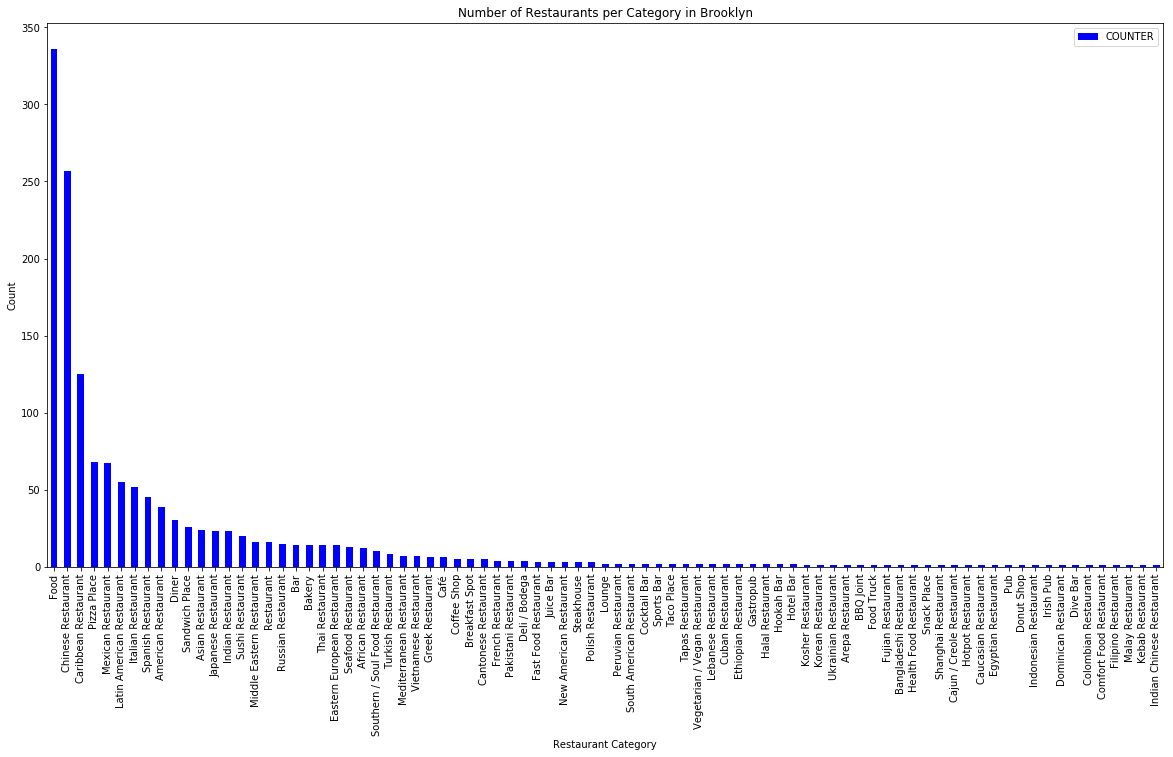

In [27]:
# Bar Chart for Brooklyn
print ('Number of Restaurants in Brooklyn is ', df_brooklyn_count['COUNTER'].sum())
import matplotlib.pyplot as plt
df_brooklyn_count.plot(kind='bar', color = 'blue', figsize = (20,10))
plt.title('Number of Restaurants per Category in Brooklyn')
plt.ylabel('Count')
plt.xlabel('Restaurant Category')
plt.show()

Number of Restaurants in Queens is  1292


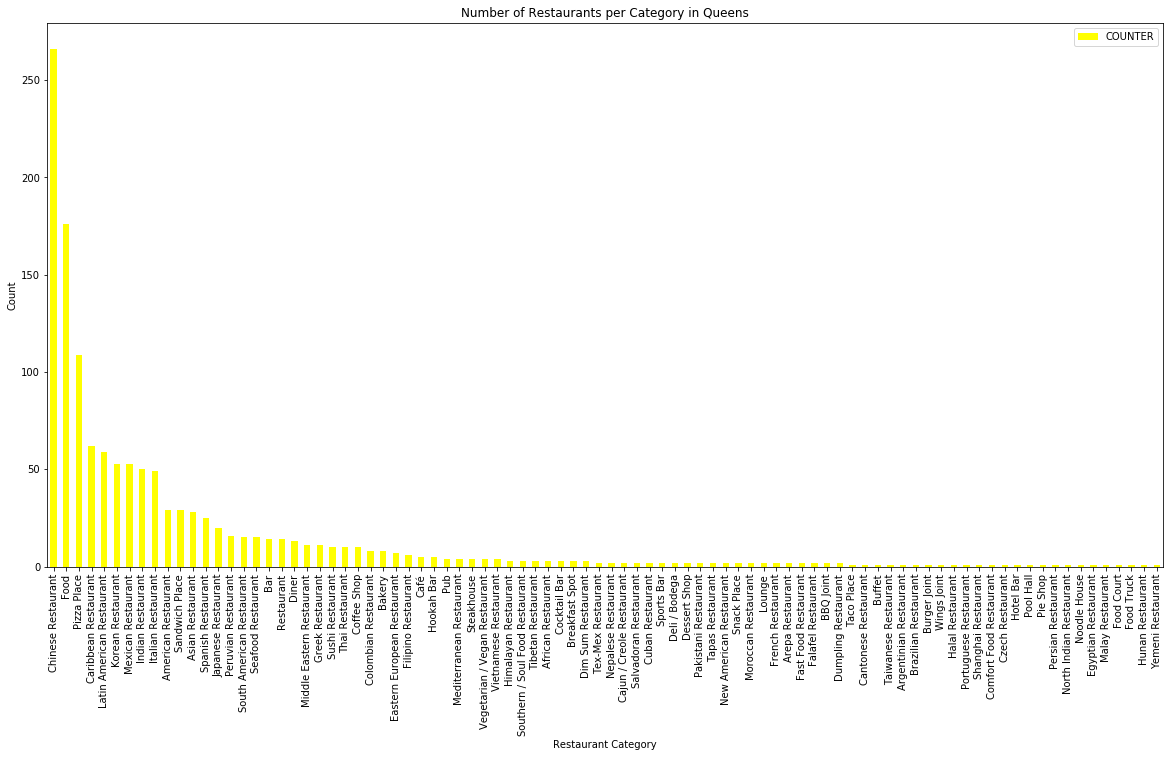

In [28]:
# Bar Chart for Queens
print ('Number of Restaurants in Queens is ', df_queens_count['COUNTER'].sum())
import matplotlib.pyplot as plt
df_queens_count.plot(kind='bar', color = 'yellow', figsize = (20,10))
plt.title('Number of Restaurants per Category in Queens')
plt.ylabel('Count')
plt.xlabel('Restaurant Category')
plt.show()

We can see that we have a good number of restaurants in all the boroughs of New York. The following table shows us the Top 10 categories with the most number of restaurants in each of the 5 Boroughs of New York.

| No.     | Queens                     | Brooklyn                   | Manhattan                  | Bronx                      | Staten Island            |
| :--     | :------------------------: | :------------------------: | :------------------------: | :------------------------: | :----------------------: |
| **1**   | Chinese Restaurants        | Chinese Restaurants        | Chinese Restaurants        | Chinese Restaurants        | Pizza Places             |
| **2**   | Pizza Places               | Caribbean Restaurants      | Italian Restaurants        | Spanish Restaurants        | Chinese Restaurants      |
| **3**   | Caribbean Restaurants      | Pizza Places               | American Restaurants       | Mexican Restaurants        | Italian Restaurants      |
| **4**   | Latin American Restaurants | Mexican Restaurants        | Japanese Restaurants       | Pizza Places               | Spanish Restaurants      |
| **5**   | Korean Restaurants         | Latin American Restaurants | Mexican Restaurants        | Latin American Restaurants | Asian Restaurant         |
| **6**   | Mexican Restaurants        | Italian Restaurants        | Latin American Restaurants | Caribbean Restaurants      | Mexican Restaurants      |
| **7**   | Indian Restaurants         | Spanish Restaurants        | Pizza Places               | Italian Restaurants        | Japanese Restaurants     |
| **8**   | Italian Restaurants        | American Restaurants       | Diners                     | Diners                     | American Restaurants     |
| **9**   | American Restaurants       | Diners                     | Spanish Restaurants        | Seafood Restaurants        | Sushi Restaurants        |
| **10**  | Sandwich Places            | Sandwich Places            | Bars                       | American Restaurants       | Sri Lankan Restaurants   |

From this table we can see that a number of categories appear in the top 10 list for each borough and are popular across all boroughs.

We have the categorization for the restaurants, however we do not have data pertaining to the user's preferences or ratings to show us what a specific users likes and dislikes are in term of cuisines / restaurants categories. **Due to lack of enough rating information, we cannot consider restaurant categories as part of this project for making recommendations. This will have to be done in the future once we have the required user preference data available to us.**

Now let us check the ratings that have been given to these restaurants.

### 4.2 Restaurants by Ratings

Let us look at the ratings further to understand how these ratings are spread across the restaurants in our list. Let us go with the following understanding of how we will be treating the ratings:  
0 - Not Rated
1 to 5 - Below Average  
5 to 6 - Average  
7 - Above Average  
8 - Good  
9 - Very Good  
10 - Excellent

In [80]:
pd.DataFrame(df_ny_restaurants[['Rating','Restaurant_Name']]).groupby('Rating').count()

,Restaurant_Name
Rating,
0.0,4881
5.2,1
5.5,1
5.6,1
5.7,1
5.8,2
5.9,3
6.0,2
6.1,2


We can summarize the above as follows:
* 37 Restaurants have been rated 5 Or 6 i.e. Average
* 36 Restaurants have been rated 7 i.e Above Average
* 26 Restaurants have been rated 8 i.e. Good
* 1 Restaurant has been rated 9 i.e. Very Good
* Remaining 4881 Restaurants have not been rated at all by anyone

Now let us look at how the restaurants in each borough have been rated.

In [81]:
# Create a tpandas dataframe that has only the boroughs and the ratings information
df_groupby_borough = df_ny_restaurants[['Borough', 'Rating']]
df_groupby_borough.set_index('Borough', inplace=True)
df_groupby_borough.head(2)

,Rating
Borough,
Bronx,0.0
Bronx,0.0


In [82]:
# Create a function that will find the ratings grouped into 10 bins in the 
# range 0 to 10 along with a seperate bin for the unrated ones.
def group_ratings_by_borough (borough, df_ratings_by_borough):
    rating_0 = 0
    rating_1 = 0
    rating_2 = 0
    rating_3 = 0
    rating_4 = 0
    rating_5 = 0
    rating_6 = 0
    rating_7 = 0
    rating_8 = 0
    rating_9 = 0
    rating_10 = 0

    for index, row in df_groupby_borough.loc[borough].iterrows():
        if row['Rating'] == 0 :
            rating_0 = rating_0 + 1
        elif row['Rating'] > 0 and row['Rating'] < 1:
            rating_1 = rating_1 + 1
        elif row['Rating'] >= 1 and row['Rating'] < 2:
            rating_2 = rating_2 + 1
        elif row['Rating'] >= 2 and row['Rating'] < 3:
            rating_3 = rating_3 + 1
        elif row['Rating'] >= 3 and row['Rating'] < 4:
            rating_4 = rating_4 + 1
        elif row['Rating'] >= 4 and row['Rating'] < 5:
            rating_5 = rating_5 + 1
        elif row['Rating'] >= 5 and row['Rating'] < 6:
            rating_6 = rating_6 + 1
        elif row['Rating'] >= 6 and row['Rating'] < 7:
            rating_7 = rating_7 + 1
        elif row['Rating'] >= 7 and row['Rating'] < 8:
            rating_8 = rating_8 + 1
        elif row['Rating'] >= 8 and row['Rating'] < 9:
            rating_9 = rating_9 + 1
        elif row['Rating'] >= 9 and row['Rating'] < 10:
            rating_10 = rating_10 + 1
    
    df_ratings_by_borough = df_ratings_by_borough.append({'Borough':borough, 'Not Rated':rating_0, '0-1':rating_1, '1-2':rating_2, '2-3':rating_3, 
                                                          '3-4':rating_4, '4-5':rating_5, '5-6':rating_6, '6-7':rating_7, '7-8':rating_8, 
                                                          '8-9':rating_9, '9-10':rating_10}, ignore_index=True)
    
    return df_ratings_by_borough

In [83]:
df_ratings_by_borough = pd.DataFrame(columns = ['Borough','Not Rated', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'])

df_ratings_by_borough = group_ratings_by_borough('Bronx', df_ratings_by_borough)
df_ratings_by_borough = group_ratings_by_borough('Manhattan', df_ratings_by_borough)
df_ratings_by_borough = group_ratings_by_borough('Brooklyn', df_ratings_by_borough)
df_ratings_by_borough = group_ratings_by_borough('Queens', df_ratings_by_borough)
df_ratings_by_borough = group_ratings_by_borough('Staten Island', df_ratings_by_borough)

df_ratings_by_borough.head()

,Borough,Not Rated,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10
0,Bronx,824,0,0,0,0,0,9,28,33,26,1
1,Manhattan,1002,0,0,0,0,0,0,0,3,0,0
2,Brooklyn,1510,0,0,0,0,0,0,0,0,0,0
3,Queens,1333,0,0,0,0,0,0,0,0,0,0
4,Staten Island,212,0,0,0,0,0,0,0,0,0,0


Based on the above consolidated table we can still see that majority of the retaurants have not been rated. Also looks like majority of the restaurants that have been rated are in Bronx. The restaurants in the other Boroughs have not been rated in Foursquare. **Due to lack of enough rating information, we cannot consider ratings as part of this project for making recommendations. This will have to be done in the future once we have enough ratings data.**

###  4.3 Restaurants by User Location

We do not have enough data as part of this project to make recommendations using restaurant categories and restaurant ratings. Let us now consider making restaurant recommendations to a user based on proximity to the user's location.  

The user searching for restaurants will be looking for restaurants based on a location. This location could be
* Their current location.
* Location where they intend to be at meal time.  

To simulate a users location, let us randomly generate a user's location using the coordinates from the neighborhood data. We can use this coordinate to find the nearest restaurants to recommend to the user. Once the model has been evaluated and confirmed to be working, we can enhance this in the future to get the actual location of the user for providing recommendations.

Now, let us first define the following functions:  
1) Function to calculate the distance between 2 given coordinates. We will be using this to calculate the distances between all the restaurants and the users location.  
2) Function to simulate the user's location

In [84]:
import geopy.distance
import random

# Function to find distance between the User's location and the Restaurants
def find_distance (u_lat, u_lng, r_lat, r_lng):
    coords_1 = (u_lat, u_lng)
    coords_2 = (r_lat, r_lng)
    distance = geopy.distance.vincenty(coords_1, coords_2).km
    return distance

# Function to return location coordinates of a user
def get_user_location ():
    # In this function we will randomly generate coordinates corresponding to the neighborhood of New York
    # to be able to simulate a user providing his coordinates while searching for restaurants.
    index = random.randint(0,df_ny_neighborhood_data.shape[0]-1)
    user_lat = df_ny_neighborhood_data.loc[index, 'Latitude']
    user_lng = df_ny_neighborhood_data.loc[index, 'Longitude']
    return ([user_lat, user_lng])

Now let us find the distance from the users location to all the restaurants in New York and add the calculated distance to the restaurants dataframe.

In [90]:
# Randomly generate Users location
user_location = get_user_location()
print ('User Coordinates are: ', user_location)

# Create a recommendation table from the restaurants dataframe
df_recommendation = pd.DataFrame(columns = ['Restaurant_Name', 'Address', 'Latitude', 'Longitude', 'Category', 'Distance'])

# Loop through the recommendation table for finding the distance to the user's location
for index, row in df_ny_restaurants.iterrows():
    restaurant_name = row[4]
    r_address = row[6]
    r_lat = row[7]
    r_lng = row[8]
    category = row [9]
    distance = find_distance (user_location[0], user_location[1], r_lat, r_lng)
    df_recommendation = df_recommendation.append({'Restaurant_Name':restaurant_name, 'Address':r_address, 'Latitude':r_lat,
                                                  'Longitude':r_lng, 'Category':category, 'Distance':distance}, ignore_index = True)
    
df_recommendation.head()

User Coordinates are:  [40.595641807368494, -73.77613282391705]


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


,Restaurant_Name,Address,Latitude,Longitude,Category,Distance
0,Big Daddy's Caribbean Taste Restaurant,"['4406 White Plains Rd (Nereid Avenue)', 'Bron...",40.899767,-73.857135,Caribbean Restaurant,34.458678
1,Kaieteur Restaurant & Bakery,"['4379 White Plains Rd (at E 237th St)', 'Bron...",40.899768,-73.857184,Caribbean Restaurant,34.459671
2,Bay 241 Restaurant & Lounge,"['4466 Baychester Ave (E 241st St)', 'Bronx, N...",40.901823,-73.847089,Caribbean Restaurant,34.525192
3,Cooler Runnings Jamaican Restaurant Inc,"['1802 Nereid Ave (Wickham)', 'Bronx, NY 10466...",40.898276,-73.850381,Caribbean Restaurant,34.187267
4,Golden Fountain Restaurant,"['Baychester Avenue', 'Bronx, NY', 'United Sta...",40.889042,-73.842313,Caribbean Restaurant,33.057780


The restaurants recommendation table has the distance of each restaurant from the user's location. Let us now sort the restaurants data in ascending order of distance to be able to find the restaurants from the nearest one to the farthest one.

In [91]:
df_recommendation.sort_values(by=['Distance'], axis = 0, ascending = True, inplace = True)
print(df_recommendation.shape)

(4787, 6)


We can see that the size of the recommendation table is the same as our cleaned up list of restaurants. Now let us look at the top 20 and the bottom 20 from the table in terms of distance from the user's location.

In [92]:
df_recommendation.tail(20)

,Restaurant_Name,Address,Latitude,Longitude,Category,Distance
4460,Amboys Pizza and Restaurant,"['27 Seguine Ave', 'Staten Island, NY 10309', ...",40.526097,-74.201225,Pizza Place,36.820453
4740,New Island Chinese Restaurant,"['27 Seguine Ave', 'Staten Island, NY 10309', ...",40.525616,-74.201175,Chinese Restaurant,36.827679
4374,Islander Taste I,"['654 Rossville Ave (Woodrow Rd.)', 'Staten Is...",40.542727,-74.207586,Chinese Restaurant,37.005187
802,Yayas Restaurant,"['440 Riverdale Ave', 'Yonkers, NY 10705', 'Un...",40.917124,-73.901663,Food,37.240833
803,El Valle Restaurant,"['440 Riverdale Ave', 'Yonkers, NY 10705', 'Un...",40.917151,-73.901599,Spanish Restaurant,37.242169
801,New Hing Wong Chinese Restaurant,"['417 Riverdale Ave', 'Yonkers, NY 10705', 'Un...",40.917515,-73.900423,Chinese Restaurant,37.252862
4467,Butler's Restaurant,"['2574 Arthur Kill Rd', 'Staten Island, NY 103...",40.552382,-74.218918,Food,37.799083
4461,Z-Two Diner & Lounge; 24 Hrs,"['2925 Veterans Rd W', 'Staten Island, NY 1030...",40.527291,-74.230811,Diner,39.247695
4466,Loon Chuan,"['85 Page Ave (Richmond Valley Rd.)', 'Staten ...",40.522241,-74.234862,Chinese Restaurant,39.697140
4463,Page Plaza Diner,"['75 Page Ave', 'Staten Island, NY 10309', 'Un...",40.522336,-74.234909,Diner,39.698804


From the above table, we can see that the last 20 records from the recommendations table show the 20 restaurants that are farthest from the user's location.

In [93]:
df_top_20 = df_recommendation.head(20).copy()
df_top_20

,Restaurant_Name,Address,Latitude,Longitude,Category,Distance
4019,New Garden Restaurant,"['4317 Beach Channel Dr', 'Far Rockaway, NY 11...",40.594204,-73.777074,Asian Restaurant,0.178426
4020,Rockaway Pizza & Restaurant,"['3213 Beach Channel Dr', 'Far Rockaway, NY 11...",40.596339,-73.771097,Pizza Place,0.433259
4022,Golden Lee Chinese Restaurant,"['3886 Rockaway Beach Blvd', 'Far Rockaway, NY...",40.594535,-73.770300,Chinese Restaurant,0.508779
4023,Xing Xing Chinese Restaurant,"['3712 Rockaway Beach Blvd', 'Far Rockaway, NY...",40.593898,-73.770340,Chinese Restaurant,0.527164
4021,Buona Pizza Restaurant,"['32-13 Beach Channel Dr', 'Far Rockaway, NY 1...",40.598049,-73.766563,Pizza Place,0.852982
3981,Six Flags Chinese Restaurant,"['558 Beach 25th St', 'Far Rockaway, NY 11691'...",40.599981,-73.762078,Chinese Restaurant,1.283513
3977,Beautiful Chinese Restaurant,"['2103 Cornaga Ave', 'Far Rockaway, NY 11691',...",40.602320,-73.758810,Chinese Restaurant,1.643125
3986,Cheung Hing Kitchen,"['1729 Seagirt Blvd', 'Far Rockaway, NY', 'Uni...",40.596716,-73.754741,Chinese Restaurant,1.814659
4025,Boardwalk Pizza,"['68-20 Rockaway Beach Blvd.', 'Arverne, NY 11...",40.590689,-73.797161,Pizza Place,1.863120
3976,Shanis Dutch Pot Restaurant,"['609 Beach 20th St', 'Far Rockaway, NY 11691'...",40.600859,-73.753730,Food,1.982792


In the above table, we can see the list of 20 restaurants that are near the User's location. The distance column shows the distance of each restaurant to the User's location in kilometer (km). From this table we can confirm that our restaurant recommendation system is indeed recommending the restaurants that closest to the user in terms of location.

Let us now plot the top 20 restaurants from the above table along with the user's location and visualize our findings on the map of new York.

In [94]:
# create map of New York using latitude and longitude values corresponding to the user location
map_restaurants = folium.Map(location=[user_location[0], user_location[1]], zoom_start=13)

# add markers to map
i = 0
for lat, lng, name in zip(df_top_20['Latitude'], df_top_20['Longitude'], df_top_20['Restaurant_Name']):
    label = name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_restaurants)
    
folium.CircleMarker(
    [user_location[0], user_location[1]],
    radius=3,
    popup='User Location',
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7,
    parse_html=False).add_to(map_restaurants)  

map_restaurants

In the above map the User location is displayed as the red circle and the Top 20 closest restaurants are displayed as blue circles. From this we can visually verify the results of our restaurant recommendation system that provides the list of restaurants that are located near the User's location.

## 5. Results and Discussion

Our analysis above shows that there is a good number of restaurants i.e. 4787 restaurants existing in the Neighborhoods of New York. We can also see that there is a good spread of these restaurants across the neighborhoods of New York. The spread of the restaurants across the neighborhoods of New York is as shown below.

|     Borough     | Restaurant Count |
| :-------------- | :--------------: |
| Bronx           | 881              |
| Manhattan       | 945              |
| Brooklyn        | 1461             |
| Queens          | 1292             |
| Staten Island   | 208              |

We had started off with the Neighborhood data for New York. This we downloaded from the web. We then used this information (coordinates of the neighborhoods) to find restaurants in these neighborhoods. We used the Foursquare Places API for finding the restaurants that are in these neighborhoods and also gather the details that we needed pertaining to these restaurants i.e. Name, Address, Coordinates, ratings, restaurant categories etc.

We performed detailed analysis of this restaurant data that we had collected by 1) correcting inaccurate data, 2) identifying and correcting missing data, 3) removing unwanted pieces of data. We then further analyzed the restaurants data to see if we had the following pieces of information for being able to make appropriate recommendations about restaurants:  
* Location information for all the restaurants
* Ratings information for the restaurants
* User information regarding user's rating history / preferences in terms of restaurants
* Category information regarding restaurants

From our analysis we could see that we had the following pieces of information.  

| What we know               | What we do not know           |
| :------------------------- | :---------------------------- |
| 1) Location of Restaurants | 1) User Ratings / Preferences |
| 2) Category of Restaurants | 2) Restaurant's Ratings       |


Based on the above information and our analysis, we have enough information to make a restaurant recommendation based on location proximity using:
1) location of the user (which we have assumed for now and will be provided by the user in the actual system)
2) location of the Restaurants in the neighborhoods of New York (we got this information from Foursquare)
We used the above location data to calculate the distance of all the restaurants from the users location and then sorted the restaurants based on distance so that we have the list of restaurants from the closest one to the farthest one.

Although we also have information regarding the Categories of the restaurants, we are not able to use this data to make a recommendation in the absence of information regarding User Preferences and User past ratings for various cuisines.

Finally we have built a recommendation system that would recommend the top 20 restaurants that are closest to the location provided by the user. We have validated the results based on the distance of each restaurant from the user provided location. We have also visualized the user location along with the recommended restaurants' locations on the map of New York to validate our recommendation.

There is ample scope for future studies to improve this recommendation engine and expanding it to include other aspects that we have identified above for making a more complete recommendation. This can also be extended further to provide restaurant recommendations for locations other than New York and also for providing recommendations on other venues.

## 6. Conclusion

Purpose of this project is to model a recommendation system that utilizes location data for recommending restaurants to users in the Neighborhood of New York. There is a whole world of people traveling, who are looking out for recommendations to meet their needs. The goal here is to provide better outcomes to such people that are looking for recommendations.